## Advanced Himawari Imager (AHI) Demo

In this example we will learn how to read in and visualise data from the Advanced Himawari Imager.

In [1]:
# Ignore warning and debug messages
# NB: If things go wrong, you can turn the debugger on and turn the warnings filter off.
import warnings
warnings.catch_warnings()
warnings.simplefilter("ignore")
from satpy.utils import debug_off; debug_off()


from satpy import Scene
from satpy import available_readers
from datetime import datetime
from glob import glob

Whenever we use SatPy, we will always use the Scene object to read in various satellite datasets. Xarray is working under the hood to interpret the various file formats that satellite data comes in.

When SatPy is first installed, not all of the supported satellite data 'readers' are included. So we can first look at what comes from a standard install of SatPy using the `available_readers()` object (imported above).

In [2]:
print(available_readers())

['abi_l1b', 'abi_l1b_scmi', 'abi_l2_nc', 'acspo', 'agri_fy4a_l1', 'agri_fy4b_l1', 'ahi_hrit', 'ahi_hsd', 'ahi_l1b_gridded_bin', 'ami_l1b', 'amsr2_l1b', 'amsr2_l2', 'amsr2_l2_gaasp', 'amsub_l1c_aapp', 'atms_l1b_nc', 'atms_sdr_hdf5', 'avhrr_l1b_aapp', 'avhrr_l1b_eps', 'avhrr_l1b_hrpt', 'avhrr_l1c_eum_gac_fdr_nc', 'clavrx', 'cmsaf-claas2_l2_nc', 'electrol_hrit', 'epic_l1b_h5', 'fci_l1c_nc', 'fci_l2_nc', 'generic_image', 'geocat', 'ghi_l1', 'ghrsst_l2', 'glm_l2', 'goes-imager_hrit', 'goes-imager_nc', 'gpm_imerg', 'hsaf_h5', 'hy2_scat_l2b_h5', 'iasi_l2', 'ici_l1b_nc', 'jami_hrit', 'li_l2_nc', 'maia', 'meris_nc_sen3', 'mersi2_l1b', 'mhs_l1c_aapp', 'mimicTPW2_comp', 'mirs', 'modis_l1b', 'modis_l2', 'msi_safe', 'msu_gsa_l1b', 'mtsat2-imager_hrit', 'mviri_l1b_fiduceo_nc', 'mwi_l1b_nc', 'mws_l1b_nc', 'nucaps', 'nwcsaf-geo', 'nwcsaf-msg2013-hdf5', 'nwcsaf-pps_nc', 'oceancolorcci_l3_nc', 'olci_l1b', 'olci_l2', 'omps_edr', 'safe_sar_l2_ocn', 'sar-c_safe', 'satpy_cf_nc', 'seadas_l2', 'seviri_l1b_hri

Above we can see that `available_readers()` returns a list of the available satellite instrument readers that your SatPy install can handle. For reference, all of the supported readers can be viewed in the table from the SatPy user guide: https://satpy.readthedocs.io/en/stable/index.html#reader-table.

Once we have the data downloaded, we tell SatPy where to find the appropriate files with the helper function `find_files_and_readers`

In [8]:
from satpy import find_files_and_readers

path_ahi = './data/ahi/'
files = find_files_and_readers(#start_time=datetime(2023, 4, 17, 23), 
                               #end_time=datetime(2023, 4, 17, 23, 10),
                               reader='ahi_hsd',
                               base_dir=path_ahi)

# Check the list of files
print(files)

{'ahi_hsd': ['./data/ahi/HS_H09_20230417_2300_B01_FLDK_R10_S0210.DAT', './data/ahi/HS_H09_20230417_2300_B01_FLDK_R10_S0610.DAT', './data/ahi/HS_H09_20230417_2300_B01_FLDK_R10_S0510.DAT', './data/ahi/HS_H09_20230417_2300_B01_FLDK_R10_S0410.DAT', './data/ahi/HS_H09_20230417_2300_B01_FLDK_R10_S0310.DAT', './data/ahi/HS_H09_20230417_2300_B01_FLDK_R10_S0110.DAT', './data/ahi/HS_H09_20230417_2300_B01_FLDK_R10_S0910.DAT', './data/ahi/HS_H09_20230417_2300_B01_FLDK_R10_S0810.DAT', './data/ahi/HS_H09_20230417_2300_B01_FLDK_R10_S1010.DAT', './data/ahi/HS_H09_20230417_2300_B01_FLDK_R10_S0710.DAT', './data/ahi/HS_H09_20230417_2300_B02_FLDK_R10_S0910.DAT', './data/ahi/HS_H09_20230417_2300_B02_FLDK_R10_S0210.DAT', './data/ahi/HS_H09_20230417_2300_B02_FLDK_R10_S0110.DAT', './data/ahi/HS_H09_20230417_2300_B02_FLDK_R10_S0710.DAT', './data/ahi/HS_H09_20230417_2300_B02_FLDK_R10_S0410.DAT', './data/ahi/HS_H09_20230417_2300_B02_FLDK_R10_S1010.DAT', './data/ahi/HS_H09_20230417_2300_B02_FLDK_R10_S0810.DAT', '

The filename tells us a bit about the data we're looking at. For example, `H09` means it's Himawari-9, `20230417_2300` is the time and date in `YYYYmmdd_HHMM` format, `B01` means it's band 1 (or channel) `R10` means 1 km resolution and `S0110` means the file corresponds to the first segment of the 10 segments that make up the full disk. Once we have the file names, we can load the data into the Scene object:

In [4]:
# Load data into Scene object
scn = Scene(files)

We can print out some initial information regarding the various channels by running the following command:

In [5]:
scn.available_dataset_ids()

[DataID(name='B01', wavelength=WavelengthRange(min=0.45, central=0.47, max=0.49, unit='µm'), resolution=1000, calibration=<1>, modifiers=()),
 DataID(name='B01', wavelength=WavelengthRange(min=0.45, central=0.47, max=0.49, unit='µm'), resolution=1000, calibration=<3>, modifiers=()),
 DataID(name='B01', wavelength=WavelengthRange(min=0.45, central=0.47, max=0.49, unit='µm'), resolution=1000, calibration=<4>, modifiers=()),
 DataID(name='B02', wavelength=WavelengthRange(min=0.49, central=0.51, max=0.53, unit='µm'), resolution=1000, calibration=<1>, modifiers=()),
 DataID(name='B02', wavelength=WavelengthRange(min=0.49, central=0.51, max=0.53, unit='µm'), resolution=1000, calibration=<3>, modifiers=()),
 DataID(name='B02', wavelength=WavelengthRange(min=0.49, central=0.51, max=0.53, unit='µm'), resolution=1000, calibration=<4>, modifiers=()),
 DataID(name='B03', wavelength=WavelengthRange(min=0.62, central=0.64, max=0.66, unit='µm'), resolution=500, calibration=<1>, modifiers=()),
 DataID

We can also just list the bands in a list with:

In [6]:
scn.available_dataset_names()

['B01',
 'B02',
 'B03',
 'B04',
 'B05',
 'B06',
 'B07',
 'B08',
 'B09',
 'B10',
 'B11',
 'B12',
 'B13',
 'B14',
 'B15',
 'B16']

And we can check the available composites with:

In [7]:
scn.available_composite_names()

['airmass',
 'ash',
 'cloud_phase_distinction',
 'cloud_phase_distinction_raw',
 'cloudtop',
 'colorized_ir_clouds',
 'convection',
 'day_microphysics_ahi',
 'day_microphysics_eum',
 'dust',
 'fire_temperature',
 'fire_temperature_39refl',
 'fire_temperature_awips',
 'fire_temperature_eumetsat',
 'fog',
 'green',
 'green_nocorr',
 'green_true_color_reproduction',
 'hybrid_green',
 'hybrid_green_nocorr',
 'ir_cloud_day',
 'mid_vapor',
 'natural_color',
 'natural_color_nocorr',
 'natural_color_raw',
 'natural_color_raw_with_night_ir',
 'ndvi_hybrid_green',
 'night_ir_alpha',
 'night_ir_with_background',
 'night_ir_with_background_hires',
 'night_microphysics',
 'overview',
 'overview_raw',
 'reproduced_green',
 'reproduced_green_uncorr',
 'rocket_plume_night',
 'true_color',
 'true_color_ndvi_green',
 'true_color_nocorr',
 'true_color_raw',
 'true_color_reproduction',
 'true_color_reproduction_corr',
 'true_color_reproduction_uncorr',
 'true_color_with_night_ir',
 'true_color_with_night_

If we want to interrogate and process the data, we must first load the channels we are interested in using the Scene object. Let's look at band 1:

In [11]:
scn.load(['B14'])

Now that we have the data loaded, we can view more metadata using the print function:

In [12]:
print(scn)

<xarray.DataArray 'clip-22ddd2d049f51e4754c3b528a1fbf29e' (y: 11000, x: 11000)>
dask.array<concatenate, shape=(11000, 11000), dtype=float64, chunksize=(1100, 4096), chunktype=numpy.ndarray>
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",E...
  * y        (y) float64 5.5e+06 5.499e+06 5.498e+06 ... -5.499e+06 -5.5e+06
  * x        (x) float64 -5.5e+06 -5.499e+06 -5.498e+06 ... 5.499e+06 5.5e+06
Attributes: (12/18)
    orbital_parameters:   {'projection_longitude': 140.7, 'projection_latitud...
    time_parameters:      {'nominal_start_time': datetime.datetime(2023, 4, 1...
    resolution:           1000
    platform_name:        Himawari-9
    id:                   DataID(name='B01', wavelength=WavelengthRange(min=0...
    sensor:               ahi
    ...                   ...
    reader:               ahi_hsd
    area:                 Area ID: FLDK\nDescription: AHI FLDK area\nProjecti...
    calibration:          reflectance
    modifiers:   

If we want to view the data, we can use the `show()` method. However, Jupyter notebooks don't handle large images very well. Instead we can save the image
to disk (and track its progress using `dask`):

In [13]:
from dask.diagnostics import ProgressBar

with ProgressBar():
    scn.save_dataset('B01', tiled=True, filename='./data/geotiff/ahi_B01.tif')

# scn.show('B01')

[########################################] | 100% Completed | 885.60 ms


Say we wanted to look at different channels side-by-side we could do

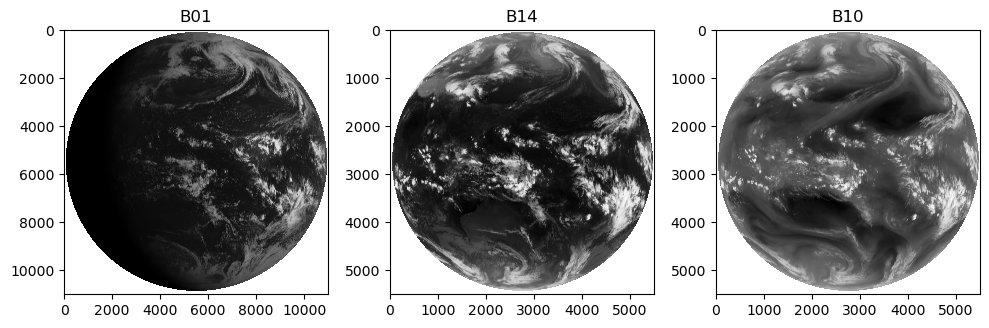

In [14]:
import matplotlib.pyplot as plt


scn.load(['B01', 'B14', 'B10'])

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Here we convert the data into 2d numpy arrays
B01 = scn['B01'].values
B14 = scn['B14'].values
B10 = scn['B10'].values

ax1.imshow(B01, cmap='Greys_r')
ax1.set_title('B01')

ax2.imshow(B14, cmap='Greys')
ax2.set_title('B14')

ax3.imshow(B10, cmap='Greys')
ax3.set_title('B10')

fig.tight_layout()
plt.show()


Now, let's make a pretty picture of Australia by resmapling the full disk and running the `true_color` compositor. SatPy provides several pre-defined regions to quickly resample imagery, making this task fairly straightforward:

In [15]:
from dask.diagnostics import ProgressBar

scn.load(['true_color'])
lcn = scn.resample('australia')

with ProgressBar():
    lcn.save_dataset('true_color', tiled=True, filename='./data/geotiff/ahi_australia_tc.tif')


[########################################] | 100% Completed | 12.88 ss


 Note that the pre-defined areas can be found in your `/etc/areas.yaml` file. E.g.

In [16]:
! cat $CONDA_PREFIX/lib/python3.11/site-packages/satpy/etc/areas.yaml

# This file contains a set of pre-defined areas
# to be used for resampling purposes.

# -----------------------------------------------------------------------------
# -------------------------- Geostationary Areas ------------------------------
# -----------------------------------------------------------------------------
# This section contains a set of full-disk and regional areas in geostationary
# projection.


# ---------- Meteosat Second Generation (MSG) / SEVIRI Instrument -------------

# Full disk

msg_seviri_fes_3km:
  description:
    MSG SEVIRI Full Earth Scanning service area definition
    with 3 km resolution
  projection:
    proj: geos
    lon_0: 0.0
    a: 6378169.0
    b: 6356583.8
    h: 35785831.0
  shape:
    height: 3712
    width: 3712
  area_extent:
    lower_left_xy: [-5570248.686685662, -5567248.28340708]
    upper_right_xy: [5567248.28340708,   5570248.686685662]

msg_seviri_fes_1km:
  description:
    MSG SEVIRI Full Earth Scanning service area definitio

Now let's say we're interested in a particular area, not included in the SatPy `areas.yaml` file. Often we only know the latitude/longitude extents. Pyresample uses the PROJ conventions to define map projections. More information can be found here: https://proj.org/. We can create a resampling object, known as an `area_definition`, which we can use to resample the AHI full disk to. For example:

In [17]:
from pyresample import create_area_def

# Let's look at a region that covers Macquarie Isalnd
extent = [158.6, 159.2, -54.8, -54.4]
area_def = create_area_def('Macquarie Island', "+proj=eqc", units="degrees",
                           area_extent=(extent[0], extent[2], extent[1], extent[3]), resolution=0.01)

# Resample to custom area def
scn.load(['true_color'])
lcn = scn.resample(area_def)

with ProgressBar():
    lcn.save_dataset('true_color', tiled=False, filename='./data/geotiff/ahi_mac_island_tc.tif')


[########################################] | 100% Completed | 2.53 sms


Now we can see Macquarie Island just looks like a collection of blurred pixels in the AHI data. This is because the spatial resolution of the visible pixels is 1 km. In the MODIS and MSI examples we'll see how this improves with better spatial resolutions from the polar orbiting sensors.

## Exercise
AHI covers an entire Earth's disk. Can you reproject the AHI data to zoom into another regional area of interest? Maybe Japan or how about over South Australia?